In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune

#from alphabase.spectral_library.flat import SpecLibFlat
from alphabase.spectral_library.base import SpecLibBase
#from alphabase.spectral_library.reader import LibraryReaderBase

from alphadia.extraction.data import TimsTOFDIA
from alphadia.extraction.planning import Plan, Workflow
from alphadia.extraction.calibration import RunCalibration
from alphadia.extraction.candidateselection import MS1CentricCandidateSelection
from alphadia.extraction.scoring import fdr_correction, MS2ExtractionWorkflow
import alphadia.extraction.utils as utils
yaml_file = 'config.yaml'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A1_1_500.d',
             '/Users/georgwallmann/Documents/data/raw_data/Alpha_dia_benchmarking/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A2_1_504.d',
             '/Users/georgwallmann/Documents/data/raw_data/Alpha_dia_benchmarking/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A3_1_508.d',
             '/Users/georgwallmann/Documents/data/raw_data/Alpha_dia_benchmarking/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_diaPASEF_S4-A4_1_512.d',
             #'/Users/georgwallmann/Documents/data/raw_data/Alpha_dia_benchmarking/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_SyP_classical_5bins_S2-A1_1_449.d',
             #'/Users/georgwallmann/Documents/data/raw_data/Alpha_dia_benchmarking/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_SyP_classical_5bins_S2-A2_1_453.d',
             #'/Users/georgwallmann/Documents/data/raw_data/Alpha_dia_benchmarking/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_SyP_classical_5bins_S2-A3_1_457.d',
             #'/Users/georgwallmann/Documents/data/raw_data/Alpha_dia_benchmarking/diaPASEF_vs_synchroPASEF/20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min_IM0713_SyP_classical_5bins_S2-A4_1_464.d'

             ]

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')


0:00:02.350512  WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap_eny0pux5. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 1,194,279,755,776
0:00:02.351047  WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
0:00:02.351264  INFO: 


In [2]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_shared_eg.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)


In [4]:
plan = Plan(raw_files)
plan.from_spec_lib_base(test_lib)
#plan.run(output_location, keep_decoys=True, fdr=1.0)
for dia_data, precursors_flat, fragments_flat in plan.get_run_data():
    break

0:00:10.178386  PROGRESS:       _   _      _         ___ ___   _   
0:00:10.179007  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:10.179247  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:10.179474  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:10.179864  PROGRESS:            |_|                            
0:00:10.180114  PROGRESS: 
0:00:10.180669  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:10.185935  PROGRESS: version: 1.0.1
0:00:10.186306  PROGRESS: hostname: Georgs-MBP.fritz.box
0:00:10.186541  PROGRESS: date: 2023-03-09 00:13:05
0:00:14.559425  INFO: renaming precursor_columns columns
0:00:14.560285  INFO: renaming fragment_columns columns
0:00:14.560665  INFO: ========= Library Stats =========
0:00:14.560864  INFO: Number of precursors: 275,196
0:00:14.590076  INFO: 	thereof targets:137,601
0:00:14.590614  INFO: 	thereof decoys: 137,595
0:00:14.592876  INFO: 

In [5]:
fragments_flat

,mz_library,intensity,cardinality,type,loss_type,charge,number,position
0,470.753601,0.181706,1,121,0,2,7,0
1,803.441015,0.070258,1,121,0,1,6,1
2,402.224146,0.075845,1,121,0,2,6,1
3,640.377686,0.071016,1,121,0,1,5,2
4,545.235438,0.136919,1,98,0,1,4,3
...,...,...,...,...,...,...,...,...
3980011,2155.048647,0.069217,1,121,0,1,27,21
3980012,814.441743,0.082249,1,121,0,1,10,38
3980013,686.383165,0.048653,1,121,0,1,8,40
3980014,615.346052,0.129975,1,121,0,1,7,41


In [7]:
from alphadia.extraction import hybridselection

selection = hybridselection.HybridCandidateSelection(
    dia_data,
    precursors_flat,
    fragments_flat,
    rt_tolerance=360,
    mz_tolerance=30,
    mobility_tolerance=0.05,
    candidate_count=3,
    thread_count=20,
    debug=True,
)

egs = selection()

0:01:21.941449  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:01:21.941948  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:01:21.942194  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:01:21.942458  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 11.60
100%|██████████| 45866/45866 [00:00<00:00, 48857.97it/s]


In [33]:
egs[0].mz

array([1198.624442  , 1200.63698823, 1202.64661981, 1240.67138493,
       1242.68393842, 1244.69357   ])

In [7]:
egs[0].fragments

In [214]:
egs.

In [86]:
precursors_flat

,elution_group_idx,precursor_idx,decoy,flat_frag_start_idx,flat_frag_stop_idx,charge,rt_library,mz_library,sequence,i_0,i_1,i_2,i_3,i_4,i_5,nAA,raw_name
0,51212,153636,0,2775924,2775934,2,645.184101,404.252372,LSGLSFK,0.620249,0.286449,0.076168,0.014817,0.002316,0.000000,7,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...
1,35451,106354,0,2686784,2686790,2,574.713856,443.245078,GTTYIFR,0.594959,0.298511,0.085611,0.017911,0.003008,0.000000,7,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...
2,35451,106353,0,2686784,2686790,2,574.713856,443.245078,GTTYIFR,0.594959,0.298511,0.085611,0.017911,0.003008,0.000000,7,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...
3,9113,27341,1,1998029,1998037,2,372.984781,458.752933,DELENLK,0.603925,0.289007,0.085077,0.018655,0.003337,0.000000,7,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...
4,9113,27339,1,2997937,2997945,2,372.984781,458.752933,DELENLK,0.603925,0.289007,0.085077,0.018655,0.003337,0.000000,7,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269983,718,2155,1,3483810,3483822,4,349.349325,939.208835,ALSAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAASK,0.138326,0.258237,0.256555,0.178955,0.097889,0.044551,49,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...
269984,718,2156,1,3483810,3483822,4,349.349325,939.208835,ALSAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAASK,0.138326,0.258237,0.256555,0.178955,0.097889,0.044551,49,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...
269985,717,2153,0,2488195,2488207,4,349.349325,932.201010,AASAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAATK,0.141394,0.260841,0.256465,0.177225,0.096112,0.043393,49,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...
269986,717,2152,0,2488195,2488207,4,349.349325,932.201010,AASAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAATK,0.141394,0.260841,0.256465,0.177225,0.096112,0.043393,49,20221221_TIMS05_PaSk_SA_HeLa_Evo05_200ng_21min...


In [17]:
import numba as nb

os.environ['DEBUG'] = 'True'

from alphadia.extraction.hybridselection import HybridElutionGroup, HybridElutionGroupContainer

def assemble_elution_groups(
        precursors_flat,
        rt_column='rt_library',
        mobility_column='mobility_library',
        precursor_mz_column='mz_library'
        ):
    
    """
    Assemble elution groups from precursor library.

    Parameters
    ----------

    precursors_flat : pandas.DataFrame
        Precursor library.

    rt_column : str
        Column name of the retention time values.

    mobility_column : str
        Column name of the mobility values.

    precursor_mz_column : str
        Column name of the precursor m/z values.

    Returns
    -------
    HybridElutionGroupContainer
        Numba jitclass with list of elution groups.
    """
    
    if len(precursors_flat) == 0:
        return

    available_isotopes = utils.get_isotope_columns(precursors_flat.columns)
    available_isotope_columns = [f'i_{i}' for i in available_isotopes]

    precursors_sorted = precursors_flat.sort_values('elution_group_idx').copy()

    @nb.njit(debug=True)
    def assemble_njit(
        elution_group_idx,
        precursor_idx,
        channel,
        flat_frag_start_stop_idx,
        rt_values,
        mobility_values,
        charge,
        decoy,
        precursor_mz,
        isotope_intensity
    ):
        elution_group = elution_group_idx[0]
        elution_group_start = 0
        elution_group_stop = 0

        eg_list = []
        
        while elution_group_stop < len(elution_group_idx)-1:
            
            elution_group_stop += 1

            if elution_group_idx[elution_group_stop] != elution_group:
                    
                eg_list.append(HybridElutionGroup(    
                    elution_group,
                    precursor_idx[elution_group_start:elution_group_stop],
                    channel[elution_group_start:elution_group_stop],
                    flat_frag_start_stop_idx[elution_group_start:elution_group_stop],
                    rt_values[elution_group_start],
                    mobility_values[elution_group_start],
                    charge[elution_group_start],
                    decoy[elution_group_start:elution_group_stop],
                    precursor_mz[elution_group_start:elution_group_stop],
                    isotope_intensity[elution_group_start:elution_group_stop]
                ))

                elution_group_start = elution_group_stop
                elution_group = elution_group_idx[elution_group_start]
                
        egs = nb.typed.List(eg_list)
        return HybridElutionGroupContainer(egs)

    return assemble_njit(
        precursors_sorted['elution_group_idx'].values.astype(np.uint32),
        precursors_sorted['precursor_idx'].values.astype(np.uint32),
        precursors_sorted['channel'].values.astype(np.uint32),
        precursors_sorted[['flat_frag_start_idx','flat_frag_stop_idx']].values.copy().astype(np.uint32),
        precursors_sorted[rt_column].values.astype(np.float64),
        precursors_sorted[mobility_column].values.astype(np.float64),
        precursors_sorted['charge'].values.astype(np.uint8),
        precursors_sorted['decoy'].values.astype(np.uint8),
        precursors_sorted[precursor_mz_column].values.astype(np.float64),
        precursors_sorted[available_isotope_columns].values.copy().astype(np.float32),
    )
    

In [18]:
assemble_elution_groups(precursors_flat)

/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/numba/core/lowering.py:107: NumbaDebugInfoWarning: Could not find source for function: <function assemble_elution_groups.<locals>.assemble_njit at 0x167374310>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))


In [76]:
%timeit assemble_elution_groups(precursors_flat)

/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/numba/core/lowering.py:107: NumbaDebugInfoWarning: Could not find source for function: <function assemble_elution_groups.<locals>.assemble_njit at 0x557768d30>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/numba/core/lowering.py:107: NumbaDebugInfoWarning: Could not find source for function: <function assemble_elution_groups.<locals>.assemble_njit at 0x557768d30>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/numba/core/lowering.py:107: NumbaDebugInfoWarning: Could not find source for function: <function assemble_elution_groups.<locals>.assemble_njit at 0x574f4cee0>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/Users/georgwallmann/miniconda3/envs/alpha/lib

485 ms ± 3.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [215]:
from alphadia.extraction import candidateselection

gaussian = candidateselection.GaussianFilter(dia_data)
kernel = gaussian.get_kernel()

2:40:34.020668  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
2:40:34.021273  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
2:40:34.021713  INFO: Expected peak length in RT is 8.00 seconds, sigma is 1.44
2:40:34.022085  INFO: Expected peak length in mobility is 0.02 1/K_0, sigma is 7.73


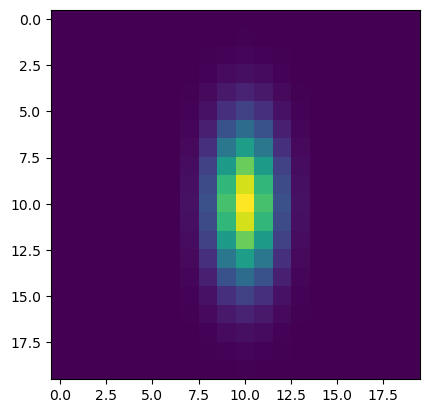

In [216]:
plt.imshow(kernel)

In [217]:
kernel[:,10:].shape

(20, 10)

In [218]:
p = dense_precursors[0,0,:,:32,:64]
p.shape

(1, 32, 64)

In [223]:
x = np.tile(p, (10,1,1,1))

In [224]:
x.shape

(10, 1, 32, 64)

In [225]:
%timeit smooth = fourier_a1(x, kernel)

149 µs ± 281 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


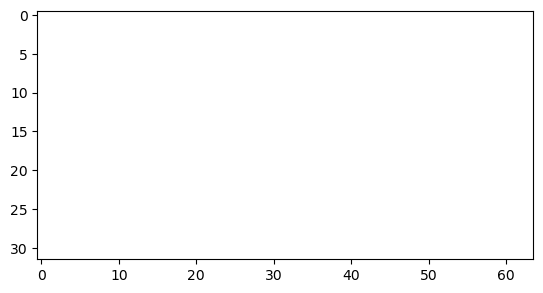

In [186]:
plt.imshow(p[0])

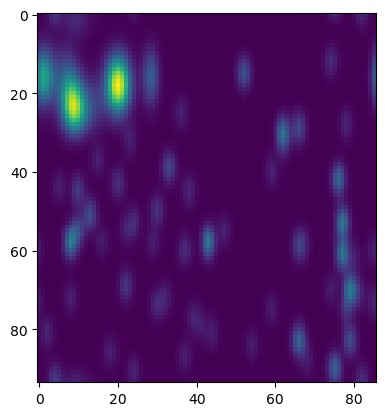

In [137]:
plt.imshow(smooth[0])

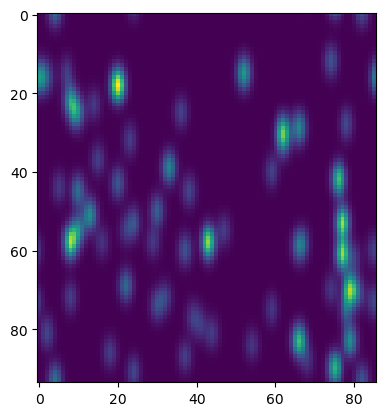

In [65]:
plt.imshow(roll(smooth[0,0],-10,-10))

In [6]:
import numba as nb
import numpy as np

@nb.njit
def jit_fft(x):
    return np.fft.fft(x)

a = np.array([2, 7, 1, 8, 2, 8, 1, 8])
jit_fft(a)

array([ 37.        -0.j        ,  -0.70710678+0.70710678j,
         2.        +1.j        ,   0.70710678+0.70710678j,
       -25.        -0.j        ,   0.70710678-0.70710678j,
         2.        -1.j        ,  -0.70710678-0.70710678j])

In [340]:
from alphadia.extraction import quadrupole, scoring, features
q = quadrupole.SimpleQuadrupole(dia_data.cycle)

In [353]:
from alphadia.extraction import scoring

extraction = scoring.MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates,
    q,
    precursor_mz_tolerance=30,
    fragment_mz_tolerance=30
)

feature_df, fragment_df = extraction()

100%|██████████| 59714/59714 [00:04<00:00, 12184.13it/s]
4:14:35.470718  INFO: Scored 59714 candidates
4:14:35.483330  INFO: 1.26% of targets failed, 3.13% of decoys failed


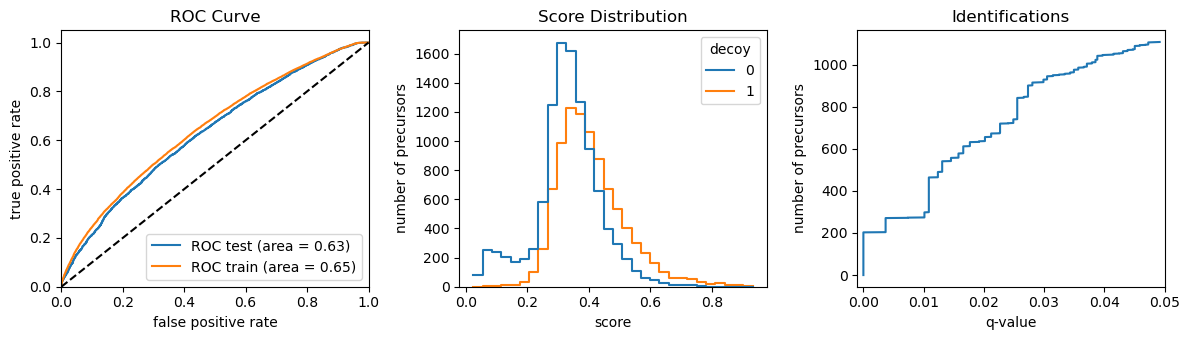

In [357]:
df = scoring.fdr_correction(feature_df)

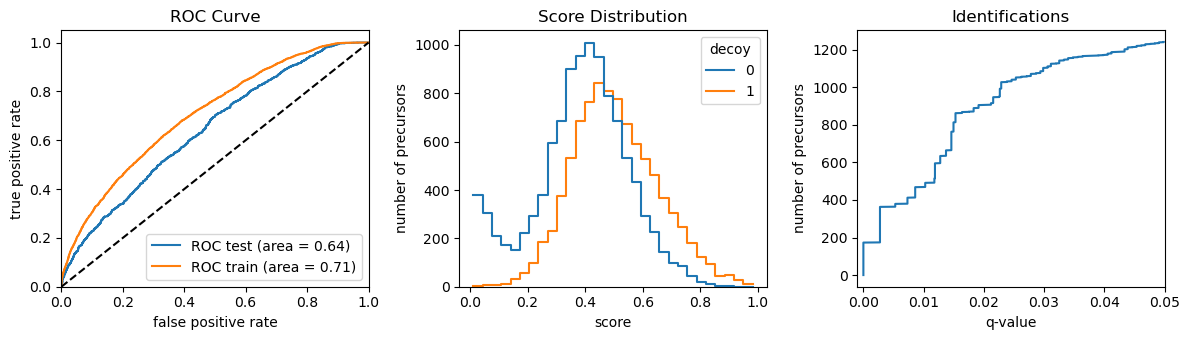

In [355]:
df = scoring.fdr_correction(df)